In [ ]:
!pip install kaggle


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle config set -n username -v tarunkumar8367


- username is now set to: tarunkumar8367


In [5]:
!kaggle config set -n key -v b2e7d853134d02ead278488109b5b1d3


- key is now set to: b2e7d853134d02ead278488109b5b1d3


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [01:01<00:00, 21.0MB/s]
100% 1.06G/1.06G [01:01<00:00, 18.7MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process (image, label):
  image = tf.cast (image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256, 256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 106ms/step - loss: 1.3642 - accuracy: 0.6004 - val_loss: 0.6200 - val_accuracy: 0.6554
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5586 - accuracy: 0.7143 - val_loss: 0.5279 - val_accuracy: 0.7316
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4723 - accuracy: 0.7767 - val_loss: 0.5581 - val_accuracy: 0.7260
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4114 - accuracy: 0.8135 - val_loss: 0.4388 - val_accuracy: 0.8060
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3695 - accuracy: 0.8349 - val_loss: 0.6699 - val_accuracy: 0.7386
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2961 - accuracy: 0.8716 - val_loss: 0.4886 - val_accuracy: 0.7744
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2142 - accuracy: 0.9085 - val_loss: 0.5617 - val_ac

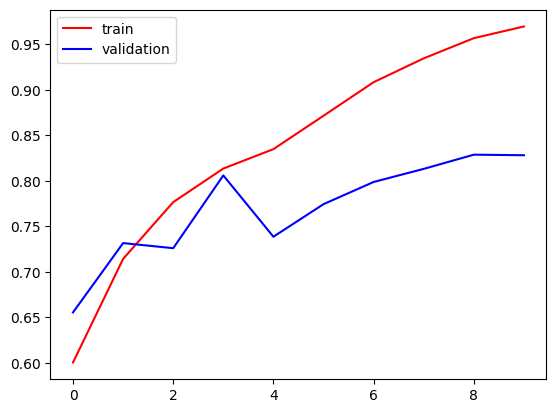

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

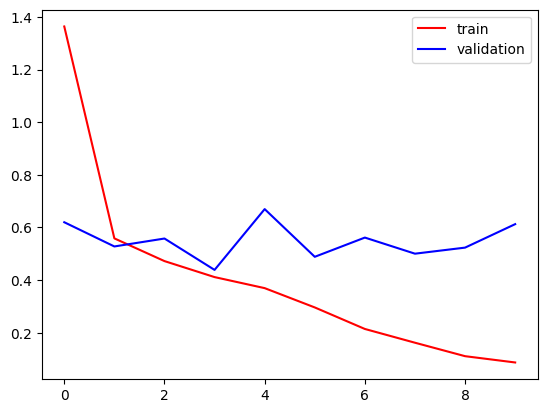

In [16]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [24]:
test_img = cv2.imread('/content/cat.jpeg')

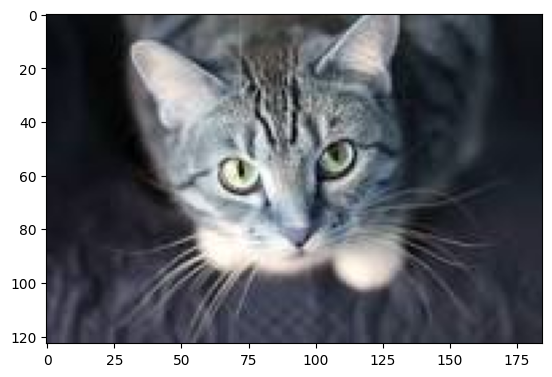

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(123, 185, 3)

In [27]:
test_img = cv2.resize(test_img,(256,256))



In [28]:
test_input = test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)